In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler

In [25]:
rr = pd.read_csv('time_series_19-covid-Recovered.csv', sep=',')
rr2 = rr.set_index(['Country/Region','Province/State'])
rr2.head(3)

,,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Thailand,NaN,15.0000,101.0000,0,0,0,0,2,2,5,5,...,31,31,31,31,31,31,31,33,34,34
Japan,NaN,36.0000,138.0000,0,0,0,0,1,1,1,1,...,43,43,43,46,76,76,76,101,118,118
Singapore,NaN,1.2833,103.8333,0,0,0,0,0,0,0,0,...,78,78,78,78,78,78,78,78,96,96


In [26]:
# read csv:
#df = pd.read_csv('time_series_19-covid-Confirmed.csv', sep=';', index_col=0,keep_default_na=False).T
df = pd.read_csv('time_series_19-covid-Confirmed.csv', sep=',')
# re-set the index (row headers):
df2 = df.set_index(['Country/Region','Province/State'])
df2.head(3)

,,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Thailand,NaN,15.0000,101.0000,2,3,5,7,8,8,14,14,...,43,43,47,48,50,50,50,53,59,70
Japan,NaN,36.0000,138.0000,2,1,2,2,4,4,7,7,...,293,331,360,420,461,502,511,581,639,639
Singapore,NaN,1.2833,103.8333,0,1,3,3,4,5,7,7,...,110,110,117,130,138,150,150,160,178,178


In [27]:
dfX = df2-rr2
dfX.head(3)

,,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Thailand,NaN,0.0,0.0,2,3,5,7,6,6,9,9,...,12,12,16,17,19,19,19,20,25,36
Japan,NaN,0.0,0.0,2,1,2,2,3,3,6,6,...,250,288,317,374,385,426,435,480,521,521
Singapore,NaN,0.0,0.0,0,1,3,3,4,5,7,7,...,32,32,39,52,60,72,72,82,82,82


In [28]:
#remove spurious last column:
df2b = dfX.loc[:, ~df2.columns.str.contains('^Unnamed')]
# transpose:
df3 = df2b.T
df3.head(5)

Country/Region Thailand Japan Singapore Nepal Malaysia           Canada  \
Province/State      NaN   NaN       NaN   NaN      NaN British Columbia   
Lat                 0.0   0.0       0.0   0.0      0.0              0.0   
Long                0.0   0.0       0.0   0.0      0.0              0.0   
1/22/20             2.0   2.0       0.0   0.0      0.0              0.0   
1/23/20             3.0   1.0       1.0   0.0      0.0              0.0   
1/24/20             5.0   2.0       3.0   0.0      0.0              0.0   

Country/Region       Australia                     Cambodia  ...          US  \
Province/State New South Wales Victoria Queensland      NaN  ... Davison, SD   
Lat                        0.0      0.0        0.0      0.0  ...         0.0   
Long                       0.0      0.0        0.0      0.0  ...         0.0   
1/22/20                    0.0      0.0        0.0      0.0  ...         0.0   
1/23/20                    0.0      0.0        0.0      0.0  ...         0.0   
1/24/20                    0.0      0.0        0.0      0.0  ...         0.0   

Country/Region                                                         \
Province/State Minnehaha, SD Bon Homme, SD Socorro, NM Bernalillo, NM   
Lat                      0.0           0.0         0.0            0.0   
Long                     0.0           0.0         0.0            0.0   
1/22/20                  0.0           0.0         0.0            0.0   
1/23/20                  0.0           0.0         0.0            0.0   
1/24/20                  0.0           0.0         0.0            0.0   

Country/Region                                      Cuba Guyana  
Province/State Oakland, MI Wayne, MI New Castle, DE  NaN    NaN  
Lat                    0.0       0.0            0.0  0.0    0.0  
Long                   0.0       0.0            0.0  0.0    0.0  
1/22/20                0.0       0.0            0.0  0.0    0.0  
1/23/20                0.0       0.0            0.0  0.0    0.0  
1/24/20                0.0       0.0            0.0  0.0    0.0  

[5 rows x 406 columns]

In [29]:
# remove Lat/Long rows
df4 = df3.drop(['Lat','Long'])
df4.tail(3)

Country/Region Thailand  Japan Singapore Nepal Malaysia           Canada  \
Province/State      NaN    NaN       NaN   NaN      NaN British Columbia   
3/10/20            20.0  480.0      82.0   0.0    105.0             28.0   
3/11/20            25.0  521.0      82.0   0.0    123.0             35.0   
3/12/20            36.0  521.0      82.0   0.0    123.0             42.0   

Country/Region       Australia                     Cambodia  ...          US  \
Province/State New South Wales Victoria Queensland      NaN  ... Davison, SD   
3/10/20                   51.0     11.0       10.0      1.0  ...         0.0   
3/11/20                   61.0     14.0       12.0      2.0  ...         0.0   
3/12/20                   61.0     14.0       12.0      2.0  ...         0.0   

Country/Region                                                         \
Province/State Minnehaha, SD Bon Homme, SD Socorro, NM Bernalillo, NM   
3/10/20                  0.0           0.0         0.0            0.0   
3/11/20                  0.0           0.0         0.0            0.0   
3/12/20                  0.0           0.0         0.0            0.0   

Country/Region                                      Cuba Guyana  
Province/State Oakland, MI Wayne, MI New Castle, DE  NaN    NaN  
3/10/20                0.0       0.0            0.0  0.0    0.0  
3/11/20                0.0       0.0            0.0  0.0    0.0  
3/12/20                0.0       0.0            0.0  3.0    1.0  

[3 rows x 406 columns]

In [30]:
# convert index to dateTime:
df4.index = pd.DatetimeIndex(df4.index)
df4.head(3)

Country/Region Thailand Japan Singapore Nepal Malaysia           Canada  \
Province/State      NaN   NaN       NaN   NaN      NaN British Columbia   
2020-01-22          2.0   2.0       0.0   0.0      0.0              0.0   
2020-01-23          3.0   1.0       1.0   0.0      0.0              0.0   
2020-01-24          5.0   2.0       3.0   0.0      0.0              0.0   

Country/Region       Australia                     Cambodia  ...          US  \
Province/State New South Wales Victoria Queensland      NaN  ... Davison, SD   
2020-01-22                 0.0      0.0        0.0      0.0  ...         0.0   
2020-01-23                 0.0      0.0        0.0      0.0  ...         0.0   
2020-01-24                 0.0      0.0        0.0      0.0  ...         0.0   

Country/Region                                                         \
Province/State Minnehaha, SD Bon Homme, SD Socorro, NM Bernalillo, NM   
2020-01-22               0.0           0.0         0.0            0.0   
2020-01-23               0.0           0.0         0.0            0.0   
2020-01-24               0.0           0.0         0.0            0.0   

Country/Region                                      Cuba Guyana  
Province/State Oakland, MI Wayne, MI New Castle, DE  NaN    NaN  
2020-01-22             0.0       0.0            0.0  0.0    0.0  
2020-01-23             0.0       0.0            0.0  0.0    0.0  
2020-01-24             0.0       0.0            0.0  0.0    0.0  

[3 rows x 406 columns]

In [38]:
# extract regions we are interested in:
df6 = df4.loc[:,[
    ('China','Hubei'),
    ('China','Beijing'),
    ('Germany',''),
    ('Italy',''),
    ('Japan',''),
    ('France','France'),
    ('Switzerland',''),
    ('Singapore',''),
    ('Korea, South',''),
    ('Poland',''),
#    ("US","King County, WA")
]]
df6.tail(3)

Country/Region    China         Germany    Italy  Japan  France Switzerland  \
Province/State    Hubei Beijing     NaN      NaN    NaN  France         NaN   
2020-03-10      20017.0   109.0  1439.0   9425.0  480.0  1772.0       488.0   
2020-03-11      18639.0   109.0  1883.0  11417.0  521.0  2269.0       648.0   
2020-03-12      17463.0   101.0  2053.0  11417.0  521.0  2269.0       648.0   

Country/Region Singapore Korea, South Poland  
Province/State       NaN          NaN    NaN  
2020-03-10          82.0       7266.0   22.0  
2020-03-11          82.0       7467.0   31.0  
2020-03-12          82.0       7536.0   49.0

In [39]:
# divide by population density.  first had this via separate csv files, 
# but the "countries" are not stable in the upstream data
df6.loc[:,('China','Beijing')] /= 22.
df6.loc[:,('China','Hubei')] /= 60.
df6.loc[:,('Japan',np.nan)] /= 126.8
df6.loc[:,('Korea, South',np.nan)] /= 52.
df6.loc[:,('Singapore',np.nan)] /= 5.85
df6.loc[:,('France','France')] /= 67.
df6.loc[:,('Germany',np.nan)] /= 82.79
df6.loc[:,('Italy',np.nan)] /= 60.5
df6.loc[:,('Switzerland',np.nan)] /= 8.57
df6.loc[:,('Poland',np.nan)] /= 4.
#df6.loc[:,("US","King County, WA")] /= 2.2
df6.tail(3)

Country/Region       China              Germany       Italy     Japan  \
Province/State       Hubei   Beijing        NaN         NaN       NaN   
2020-03-10      333.616667  4.954545  17.381326  155.785124  3.785489   
2020-03-11      310.650000  4.954545  22.744293  188.710744  4.108833   
2020-03-12      291.050000  4.590909  24.797681  188.710744  4.108833   

Country/Region     France Switzerland  Singapore Korea, South Poland  
Province/State     France         NaN        NaN          NaN    NaN  
2020-03-10      26.447761   56.942824  14.017094   139.730769   5.50  
2020-03-11      33.865672   75.612602  14.017094   143.596154   7.75  
2020-03-12      33.865672   75.612602  14.017094   144.923077  12.25

In [40]:
# time-shifted Hubei values:
hb = df6["China","Hubei"]
hb.index = pd.date_range(start="2020-03-05",periods=hb.size)
hb.name=("China","Hubei time-shifted")
hb.tail(3)

2020-04-22    333.616667
2020-04-23    310.650000
2020-04-24    291.050000
Freq: D, Name: (China, Hubei time-shifted), dtype: float64

In [41]:
df6b = pd.concat([df6,hb],axis=1) #.fillna(value=0)
df6b.loc['2020-03-10':'2020-03-15',:]

Country/Region       China              Germany       Italy     Japan  \
Province/State       Hubei   Beijing        NaN         NaN       NaN   
2020-03-10      333.616667  4.954545  17.381326  155.785124  3.785489   
2020-03-11      310.650000  4.954545  22.744293  188.710744  4.108833   
2020-03-12      291.050000  4.590909  24.797681  188.710744  4.108833   
2020-03-13             NaN       NaN        NaN         NaN       NaN   
2020-03-14             NaN       NaN        NaN         NaN       NaN   
2020-03-15             NaN       NaN        NaN         NaN       NaN   

Country/Region     France Switzerland  Singapore Korea, South Poland  \
Province/State     France         NaN        NaN          NaN    NaN   
2020-03-10      26.447761   56.942824  14.017094   139.730769   5.50   
2020-03-11      33.865672   75.612602  14.017094   143.596154   7.75   
2020-03-12      33.865672   75.612602  14.017094   144.923077  12.25   
2020-03-13            NaN         NaN        NaN          NaN    NaN   
2020-03-14            NaN         NaN        NaN          NaN    NaN   
2020-03-15            NaN         NaN        NaN          NaN    NaN   

Country/Region              China  
Province/State Hubei time-shifted  
2020-03-10              22.966667  
2020-03-11              57.900000  
2020-03-12              57.766667  
2020-03-13              80.216667  
2020-03-14              94.416667  
2020-03-15             116.416667

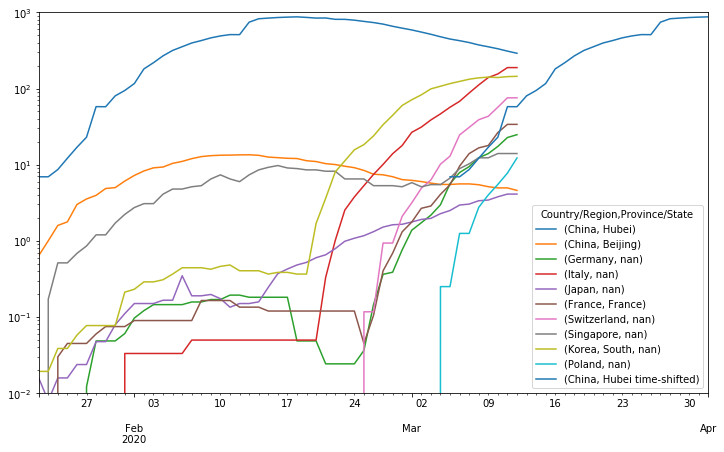

In [42]:
plt.close('all')
plt.rcParams['figure.figsize']=[12,7]
df6b.plot(kind='line',logy=True,ylim=(0.01,1000),xlim=("2020-01-22","2020-04-01"))

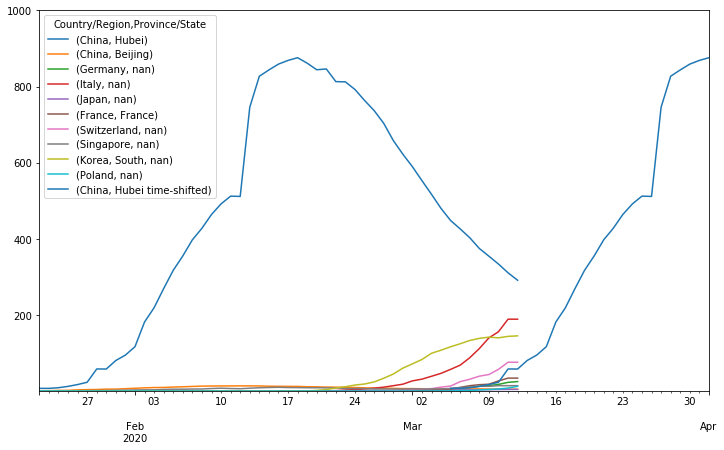

In [43]:
df6b.plot(kind='line',ylim=(0.01,1000),xlim=("2020-01-22","2020-04-01"))

In [14]:
df6.loc[:,('Poland',np.nan)].to_string()

'2020-01-22     0.00\n2020-01-23     0.00\n2020-01-24     0.00\n2020-01-25     0.00\n2020-01-26     0.00\n2020-01-27     0.00\n2020-01-28     0.00\n2020-01-29     0.00\n2020-01-30     0.00\n2020-01-31     0.00\n2020-02-01     0.00\n2020-02-02     0.00\n2020-02-03     0.00\n2020-02-04     0.00\n2020-02-05     0.00\n2020-02-06     0.00\n2020-02-07     0.00\n2020-02-08     0.00\n2020-02-09     0.00\n2020-02-10     0.00\n2020-02-11     0.00\n2020-02-12     0.00\n2020-02-13     0.00\n2020-02-14     0.00\n2020-02-15     0.00\n2020-02-16     0.00\n2020-02-17     0.00\n2020-02-18     0.00\n2020-02-19     0.00\n2020-02-20     0.00\n2020-02-21     0.00\n2020-02-22     0.00\n2020-02-23     0.00\n2020-02-24     0.00\n2020-02-25     0.00\n2020-02-26     0.00\n2020-02-27     0.00\n2020-02-28     0.00\n2020-02-29     0.00\n2020-03-01     0.00\n2020-03-02     0.00\n2020-03-03     0.00\n2020-03-04     0.25\n2020-03-05     0.25\n2020-03-06     1.25\n2020-03-07     1.25\n2020-03-08     2.75\n2020-03-09  

In [ ]:
df6.loc[:,('Poland',np.nan)]

In [ ]:
df5.loc[:,('Mainland China','Anhui')] /= 9999999.
df5.head(3)

In [ ]:
df5.to_csv("all.csv")

In [ ]:
df6['idx'] = df6.reset_index().index
df6.tail(3)

In [ ]:
df6.to_csv("reduced.csv",sep='\t',header=False)

In [ ]:
df6.iterrows?

In [ ]:
hb = df6["Mainland China"]["Hubei"]
hb.index = pd.date_range(start="2020-02-22",periods=hb.size)
hb.head(3)

In [ ]:
hb.index = pd.DatetimeIndex?

In [ ]:
pd.date_range(start="2020-01-22",periods=5)